# Simple Wine Quality Classifier on Wine Quality Dataset

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('../data/winequality-red.csv', delimiter=';')

# Analyze Train Dataset

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Correlation map between features

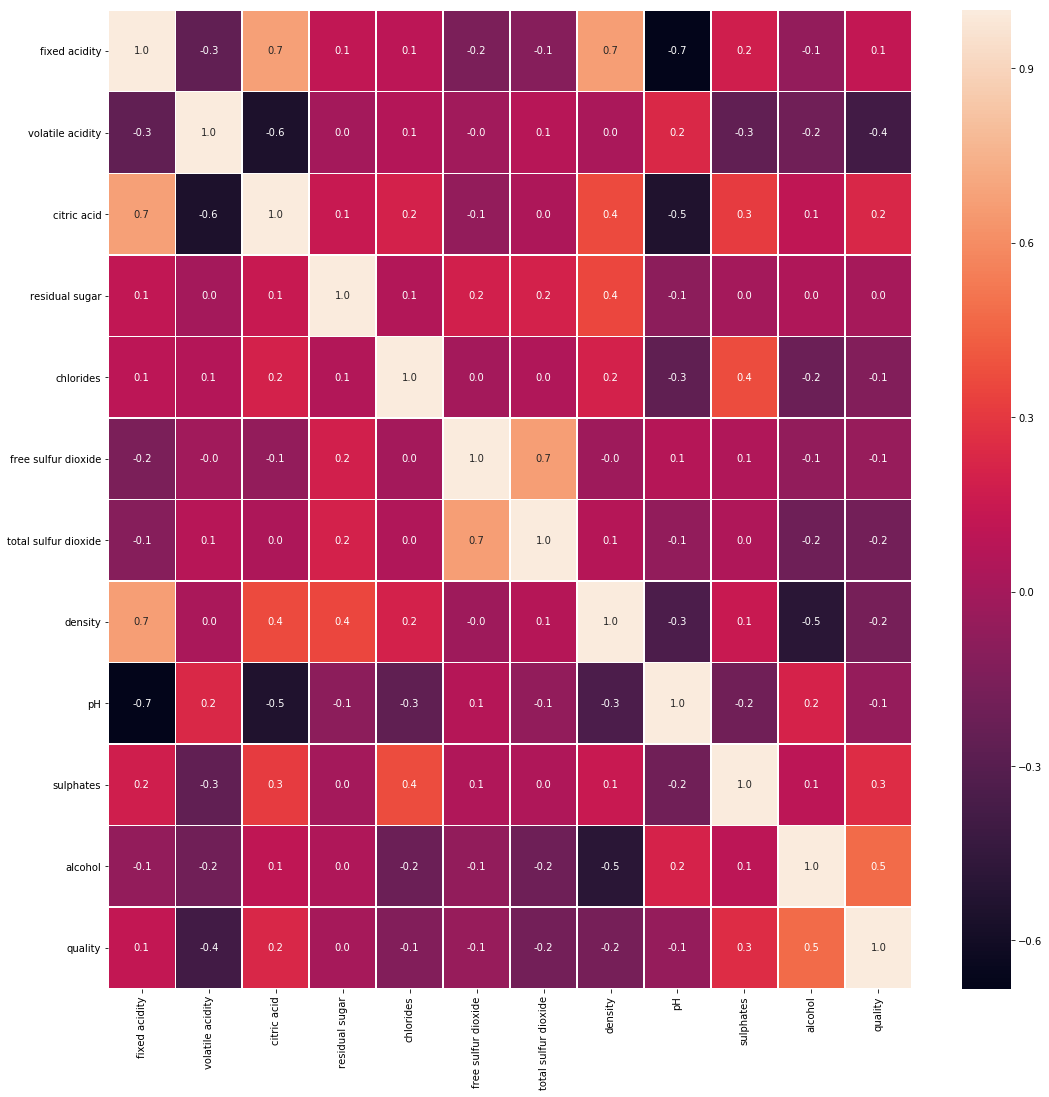

In [7]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

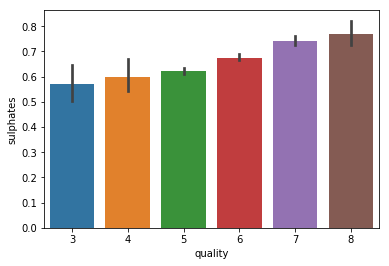

In [8]:
# Quality vs Sulphates barplot
sns.barplot(x = 'quality', y  = 'sulphates', data = df )

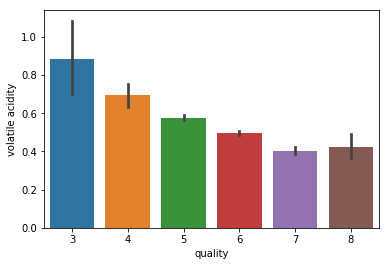

In [9]:
# Quality vs volatile acidity barplot
sns.barplot(x = 'quality', y  = 'volatile acidity', data = df )

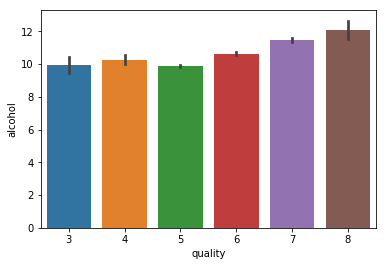

In [10]:
# Quality vs Alcohol barplot
sns.barplot(x = 'quality', y  = 'alcohol', data = df )

### Count number of instances for each quality

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Categorize Quality label

In [12]:
df_cat = df.copy()

bins = (df_cat['quality'].min(),6.5,df_cat['quality'].max())
group_names = ['bad','good']
categories = pd.cut(df_cat['quality'], bins, labels = group_names)
df_cat['quality'] = categories

In [13]:
df_cat['quality'].value_counts()

bad     1372
good     217
Name: quality, dtype: int64

### Barplots after categorigation

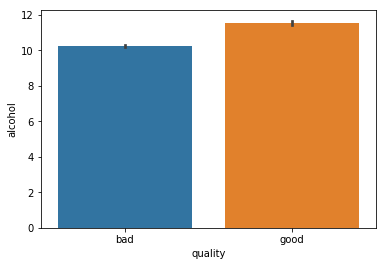

In [14]:
sns.barplot(x='quality', y='alcohol',data=df_cat)

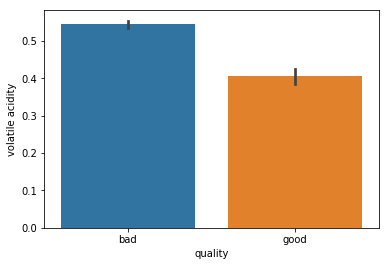

In [15]:
sns.barplot(x='quality', y='volatile acidity',data=df_cat)

# Create Features and Label Splits

In [16]:
X= df_cat.drop(['quality'], axis=1)
y = df_cat['quality']
# y.head()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1589 non-null category
dtypes: category(1), float64(11)
memory usage: 139.1 KB


### Encoding dependent variable - Quality

In [17]:
# bad = 0, good = 1
y = y.cat.codes
df_cat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape, X_test.shape)

(1279, 11) (320, 11)


# Feature Scaling to X_train and X_test to classify better.

In [19]:
fsc = StandardScaler()
X_train = fsc.fit_transform(X_train)
X_test = fsc.transform(X_test)

In [26]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier(n_estimators=32)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))

print('Models appended...')

Models appended...


In [29]:
def run_models():
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, X_train, y_train.values.ravel(), cv = 5, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Function to run the Models with Cross Validation

In [30]:
run_models()

Logistic Regression: 88.1154237716
K-Nearest Neighbour: 86.2385831521
Decision Tree Classifier: 84.6733138781
Random Forest Classifier: 90.93039621
MLP: 87.8822671092
GradientBoostingClassifier: 89.7566758221
SVC: 88.3488868067


### In this very simple Classifier without any preprocessing Random Forest has been performing the best with **90.93** % accuracy. 

# Grid search for best model and parameters

In [31]:
models_gs = {
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params_gs = { 
    'K-Nearest Neighbour': {'n_neighbors':[3, 5, 8]},
    'Decision Tree Classifier': {'max_depth': [8, 16, 32]},
    'RandomForestClassifier': { 'n_estimators': [16, 32, 64, 128] },
    'GradientBoostingClassifier': { 'n_estimators': [64, 128, 256, 512], 'learning_rate': [0.05, 0.1, 0.3, 0.9] },
    'SVC': [
#         {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.3, 0.7, 0.9, 1.0]},
    ]
}

In [32]:
def run_models_with_GS(models_gs, params_gs):
    results = []
    for model in models_gs:
        grid_search = GridSearchCV(estimator = models_gs[model],
                                   param_grid = params_gs[model],
                                   scoring = 'accuracy',
                                   cv = 5, n_jobs = 6)
        grid_search.fit(X_train, y_train)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        #here is the best accuracy
        results.append(( model, best_accuracy, best_parameters ))
    return results

In [33]:
results = run_models_with_GS(models_gs, params_gs)
for model, accuracy, params in results:
    print(model, accuracy * 100, params)

K-Nearest Neighbour 87.6465989054 {'n_neighbors': 8}
Decision Tree Classifier 87.4902267396 {'max_depth': 8}
RandomForestClassifier 91.2431587177 {'n_estimators': 128}
GradientBoostingClassifier 90.2267396403 {'learning_rate': 0.1, 'n_estimators': 128}
SVC 89.9139953088 {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


### Best Results
- K-Nearest Neighbour **87.6465989054** {'n_neighbors': 8}
- Decision Tree Classifier **87.4902267396** {'max_depth': 8}
- RandomForestClassifier **91.2431587177** {'n_estimators': 128}
- GradientBoostingClassifier **90.2267396403** {'learning_rate': 0.1, 'n_estimators': 128}
- SVC **89.9139953088** {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


